<a href="https://colab.research.google.com/github/jvwk/Project-2/blob/main/Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 Part 2
## *Jaco van Wyk*

------------


- Delete unnecessary columns
- Delete duplicate rows
- Identify and address missing values
- Identify and correct inconsistencies in data for categorical values
- Produce univariate visuals for the target and all features
- Identify outliers
- Clearly comment all of your cleaning steps and described any decisions you made

**Source of data**

>  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

<br>

**Brief description of data**

>According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
>
>This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

<br>

**Target**

>*stroke* is the target: 1 if the patient had a stroke or 0 if not

**Load and inspect data**

In [28]:
# Import relevant libraries

from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [29]:
# Mount google drive and load data

drive.mount('/content/drive')
file = '/content/drive/MyDrive/CodingDojo/03-AdvancedML/Week09/Data/healthcare_dataset_stroke_data.csv'
df = pd.read_csv(file)
df.set_index('id', inplace = True, verify_integrity = True)

Mounted at /content/drive


In [30]:
# Inspect data
print('Data frame shape: ', df.shape,'\n'*2)
print(df.info(),'\n'*2)
df.head()

Data frame shape:  (5110, 11) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB
None 




,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


There are no unnecessary columns

**Data cleaning**

In [31]:
# Assess data for duplicate rows
df.duplicated().sum()

0

There are no duplicates

In [32]:
# Assess data for missing values

miss_vals = pd.DataFrame({'Number missing': df.isna().sum()})
miss_val_pc = pd.DataFrame({'Percentage missing': df.isna().sum()/len(df)*100})
missing = pd.concat([miss_vals, miss_val_pc], axis = 1)
display(missing.round(2))

,Number missing,Percentage missing
gender,0,0.00
age,0,0.00
hypertension,0,0.00
heart_disease,0,0.00
ever_married,0,0.00
work_type,0,0.00
Residence_type,0,0.00
avg_glucose_level,0,0.00
bmi,201,3.93
smoking_status,0,0.00


BMI has 201 (3.93%) missing values

- Impute at pre-processing stage

In [33]:
# Assess data for inconsistent entries in categorical columna

num_vals = df.select_dtypes('number').columns
cat_cols = df.select_dtypes('object').columns
for i in cat_cols:
  print(f'Values for {i}:\n')
  print(df[{i}].value_counts())
  print("\n")

Values for gender:

gender
Female    2994
Male      2115
Other        1
dtype: int64


Values for ever_married:

ever_married
Yes             3353
No              1757
dtype: int64


Values for work_type:

work_type    
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
dtype: int64


Values for Residence_type:

Residence_type
Urban             2596
Rural             2514
dtype: int64


Values for smoking_status:

smoking_status 
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
dtype: int64




<ipython-input-33-0f6a90dc983e>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(df[{i}].value_counts())
<ipython-input-33-0f6a90dc983e>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(df[{i}].value_counts())
<ipython-input-33-0f6a90dc983e>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(df[{i}].value_counts())
<ipython-input-33-0f6a90dc983e>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(df[{i}].value_counts())
<ipython-input-33-0f6a90dc983e>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(df[{i}].value_counts())


There are no inconsistent values in categorical columns

**Univariate visuals**

In [34]:
# Change numerical binaries (hypertension and heart disease) to categorical
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype('string')

In [35]:
# Recategorise columns by type
num_vals = df.select_dtypes('number').columns
cat_cols = df.select_dtypes('object').columns

In [36]:
# Create colour palette reference table and store in dataframe for displaying names and hexcodes
# From code snippets - "Pandas DataFrame: Create from lists of values"
# from https://python.plainenglish.io/how-to-make-your-own-color-palette-with-matplotlib-in-python-2494e78694e

colour_names = ["darkblue", "red", "bluegrey", "orange", "green", "purple", "yellow", "darkgreen", "pink"]
colour_codes = ["#003365","#E61A1F", "#489CBA", "#FE6801", "#00B050", "#5C2F88", "#FDB211", "#506600", "#FF71BF"]
colour_df = pd.DataFrame({
  'colour_name': colour_names,
  'colour_code': colour_codes,
})

colour_df

,colour_name,colour_code
0,darkblue,#003365
1,red,#E61A1F
2,bluegrey,#489CBA
3,orange,#FE6801
4,green,#00B050
5,purple,#5C2F88
6,yellow,#FDB211
7,darkgreen,#506600
8,pink,#FF71BF


In [37]:
# UNIVARIATE PLOTTING FUNCTIONS
# Adapted from codingdojo course notes

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), color=None, order = None, palette=None):
  """
  Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()

  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100

  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)

  # Countplot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order, alpha = 0.8)

  # Rotate tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

  # Add a title with the feature name included
  ax.set_title(f"{x} distribution", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)

  # Define the most common value
  most_common_val = val_counts.index[0]

  # Define the frequency of the most common value
  freq = val_counts.values[0]

  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  print('\n'*2)
  return fig, ax

def explore_numeric(df, x, figsize=(6,5), color = 'w'):
  """
  Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """

  # Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100

  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0], ec = 'white', color=color, alpha = 0.5)

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1], fliersize = 2, color = colour, boxprops=dict(alpha=0.5))

  # Adding a title
  axes[0].set_title(f"{x} distribution", fontweight='bold')

  # Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  print('\n'*2)
  return fig, axes

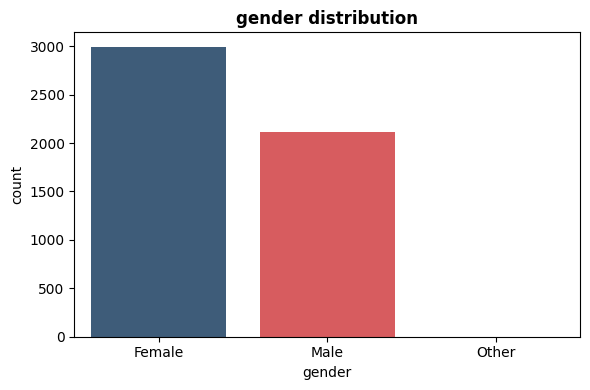

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Female' occurs 2994 times (58.59%)
- Not constant or quasi-constant.





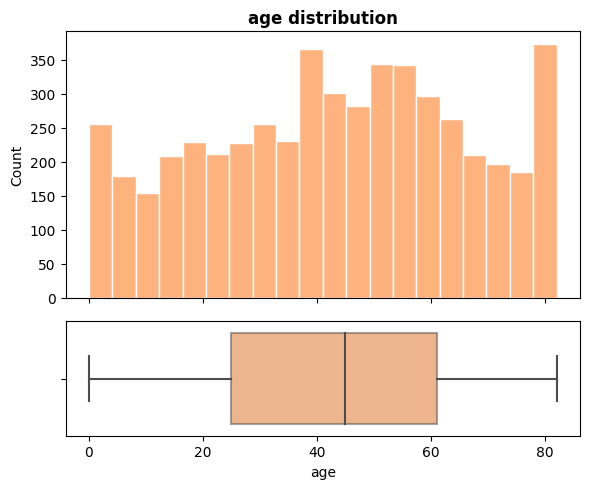

- NaN's Found: 0 (0.0%)
- Unique Values: 104
- Most common value: '78.0' occurs 102 times (2.0%)
- Not constant or quasi-constant.





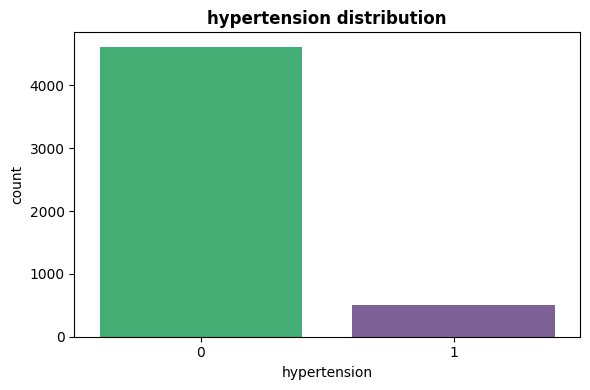

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4612 times (90.25%)
- Not constant or quasi-constant.





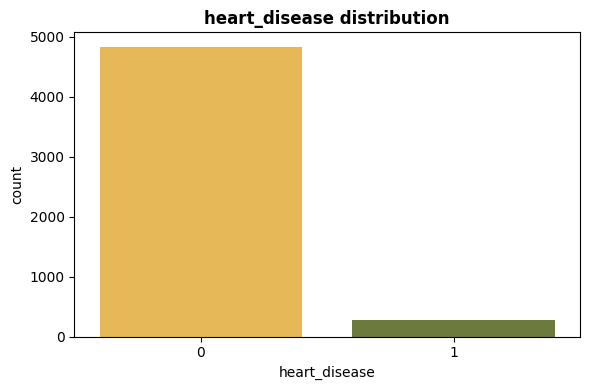

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4834 times (94.6%)
- Not constant or quasi-constant.





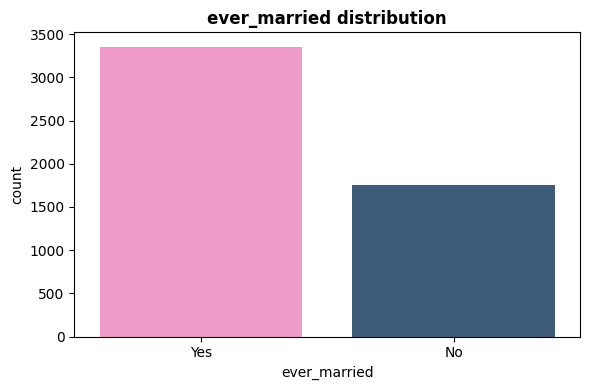

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Yes' occurs 3353 times (65.62%)
- Not constant or quasi-constant.





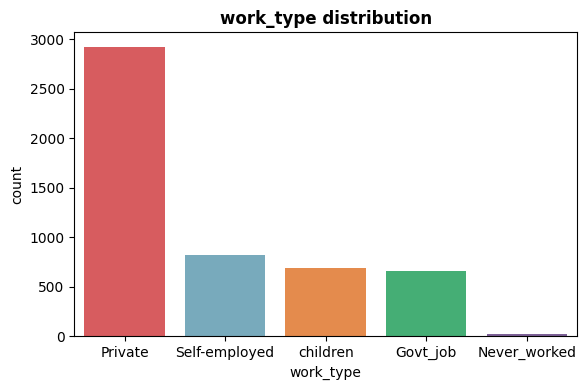

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Private' occurs 2925 times (57.24%)
- Not constant or quasi-constant.





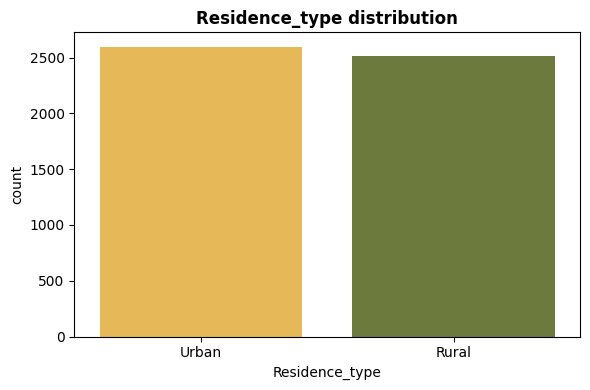

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Urban' occurs 2596 times (50.8%)
- Not constant or quasi-constant.





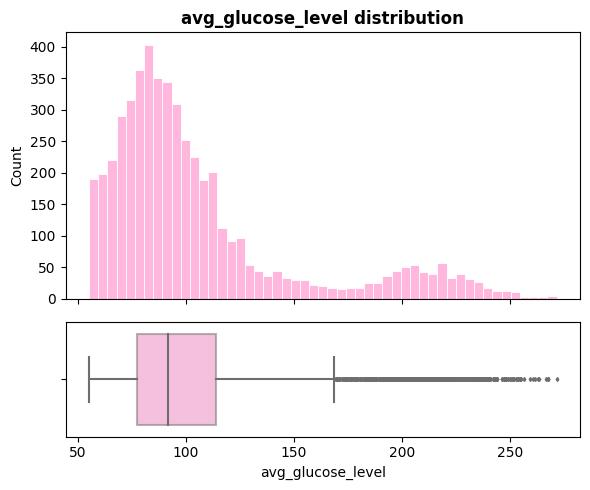

- NaN's Found: 0 (0.0%)
- Unique Values: 3979
- Most common value: '93.88' occurs 6 times (0.12%)
- Not constant or quasi-constant.





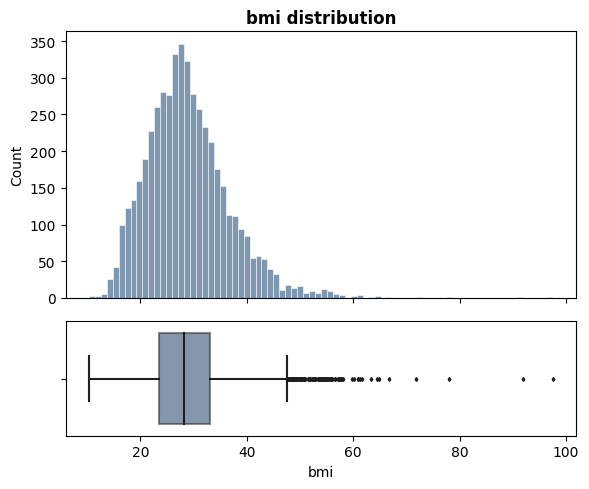

- NaN's Found: 201 (3.93%)
- Unique Values: 418
- Most common value: 'nan' occurs 201 times (3.93%)
- Not constant or quasi-constant.





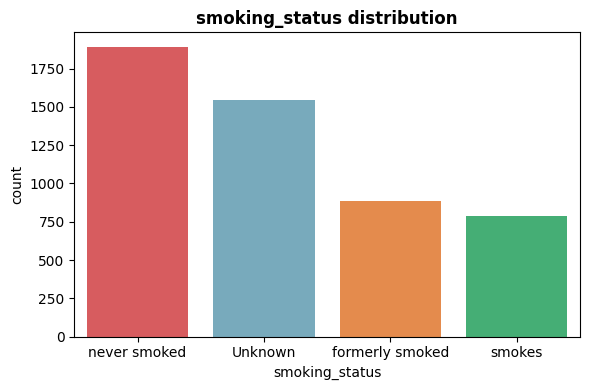

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'never smoked' occurs 1892 times (37.03%)
- Not constant or quasi-constant.





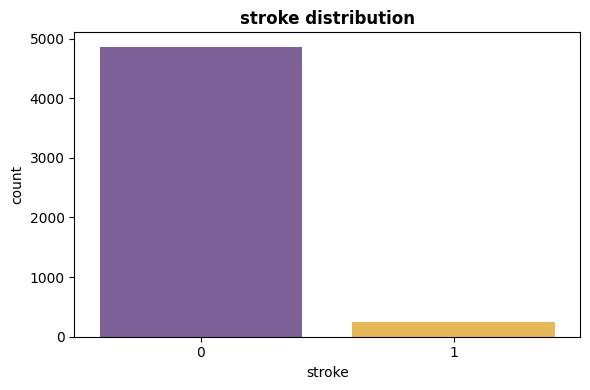

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4861 times (95.13%)
- Not constant or quasi-constant.





In [38]:
# Create appropriate plots based on data type

i = 0

for column in df.columns:

  # Rotate through colours in palette
  colour = colour_codes[i%len(colour_codes)]
  j = i%len(colour_codes)
  my_cols = colour_codes[j:] + colour_codes[:j]
  palette = sns.set_palette(sns.color_palette(my_cols))

  if not(df[column].dtype == "int" or df[column].dtype == "float"):
    order = df[column].value_counts().index

  # Run the appropriate explore function (based on columns's dtype)
  if df[column].dtype == "int" or df[column].dtype == "float":
    fig, ax = explore_numeric(df, x = column, color = colour)
    i += 1
  else:
    fig, ax = explore_categorical(df, x = column, order = order, fillna = False, placeholder = 'MISSING', palette = palette)
    i += df[column].nunique()

In [39]:
# Investigate BMI
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

BMI of 97.6 seems like an outlier; investigate further

In [61]:
# Assess height-weight combinations for BMI of 97.6

max_bmi = 97.6

height_range = [i/2 for i in range(2*130, 2*221, 5)]
df_maxbmi = pd.DataFrame({'height_cm': height_range})
df_maxbmi['weight_kg'] = (df_maxbmi['height_cm']/100)**2*max_bmi
df_maxbmi['height_in'] = df_maxbmi['height_cm']/2.54
df_maxbmi['height_ft'] = (df_maxbmi['height_in']//12).astype('int').astype('string') + "' " + round(df_maxbmi['height_in']%12,0).astype('int').astype('string') + '"'
df_maxbmi['weight_lb'] = df_maxbmi['weight_kg']*2.2
print(f'Heigh-weight combinations for BMI of {max_bmi}\n')
df_maxbmi.round(1)

Heigh-weight combinations for BMI of 97.6



,height_cm,weight_kg,height_in,height_ft,weight_lb
0,130.0,164.9,51.2,"4' 3""",362.9
1,132.5,171.3,52.2,"4' 4""",377.0
2,135.0,177.9,53.1,"4' 5""",391.3
3,137.5,184.5,54.1,"4' 6""",406.0
4,140.0,191.3,55.1,"4' 7""",420.9
5,142.5,198.2,56.1,"4' 8""",436.0
6,145.0,205.2,57.1,"4' 9""",451.4
7,147.5,212.3,58.1,"4' 10""",467.2
8,150.0,219.6,59.1,"4' 11""",483.1
9,152.5,227.0,60.0,"5' 0""",499.4


While BMI of 97.6 is exceedingly high, it is possible
- Keep as is